In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL 
epochs=25
batch_size = 32
train_dir = os.getcwd() + "/10_class_dataset_aug"


CATEGORIES = [str(i) for i in range(10)] #Simple initial category

IMG_SIZE = 50 # Big enough?



        
 

Using TensorFlow backend.


In [2]:
image_gen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.2
                    )

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SIZE, IMG_SIZE),
                                                     class_mode='sparse',
                                                     subset='training')
train_label_map = (train_data_gen.class_indices)
print(train_label_map)
                                                     


val_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                 directory=train_dir,
                                                 shuffle=True,
                                                 target_size=(IMG_SIZE, IMG_SIZE),
                                                 class_mode='sparse',
                                                 subset='validation')
val_label_map = val_data_gen.class_indices


Found 29355 images belonging to 10 classes.
{'class_0': 0, 'class_1': 1, 'class_2': 2, 'class_3': 3, 'class_4': 4, 'class_5': 5, 'class_6': 6, 'class_7': 7, 'class_8': 8, 'class_9': 9}
Found 7331 images belonging to 10 classes.


In [3]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt


model = Sequential() 

model.add(Conv2D(32, (3,3), input_shape = (50, 50, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 10 neurons, for 10 classes
model.add(Dense(10))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy"
              ,optimizer="adam"
              ,metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          3

In [4]:
history = model.fit(train_data_gen, validation_data=val_data_gen, epochs=epochs,
                    steps_per_epoch = train_data_gen.samples // batch_size,
                    validation_steps = val_data_gen.samples // batch_size,)

Train for 917 steps, validate for 229 steps
Epoch 1/25
917/917 [==============================] - 80s 87ms/step - loss: 0.7369 - accuracy: 0.7479 - val_loss: 0.4459 - val_accuracy: 0.8594
Epoch 2/25
917/917 [==============================] - 78s 85ms/step - loss: 0.1487 - accuracy: 0.9521 - val_loss: 0.2384 - val_accuracy: 0.9228
Epoch 3/25
917/917 [==============================] - 79s 86ms/step - loss: 0.0827 - accuracy: 0.9727 - val_loss: 0.2148 - val_accuracy: 0.9282
Epoch 4/25
917/917 [==============================] - 83s 90ms/step - loss: 0.0589 - accuracy: 0.9803 - val_loss: 0.1866 - val_accuracy: 0.9398
Epoch 5/25
917/917 [==============================] - 109s 119ms/step - loss: 0.0417 - accuracy: 0.9863 - val_loss: 0.1487 - val_accuracy: 0.9532
Epoch 6/25
917/917 [==============================] - 101s 110ms/step - loss: 0.0362 - accuracy: 0.9881 - val_loss: 0.1522 - val_accuracy: 0.9574
Epoch 7/25
917/917 [==============================] - 110s 120ms/step - loss: 0.0337 - a

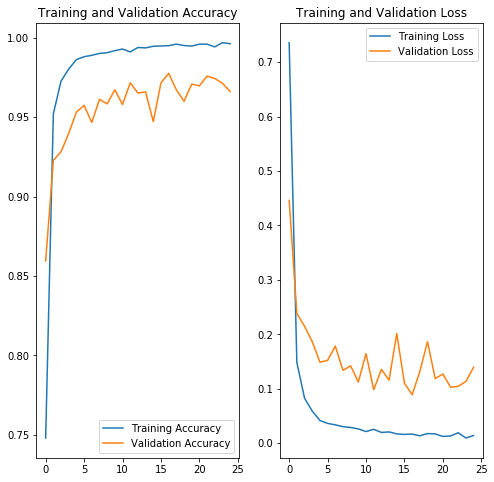

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [6]:
model.save('saved_models/10_class_aug')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_models/10_class_aug/assets


In [7]:
model = tf.keras.models.load_model(os.getcwd()+"/saved_models/10_class_aug")


In [8]:
pred_image_gen_train = ImageDataGenerator(
                    rescale=1./255              
                    )
pred_dir = os.getcwd() + "/sample_data"

pred_data_gen = pred_image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=pred_dir,
                                                     shuffle=False,
                                                     target_size=(IMG_SIZE, IMG_SIZE),
                                                     class_mode=None)


Found 8 images belonging to 1 classes.


In [9]:
predictions = model.predict(pred_data_gen)
for i in predictions: 
    value = np.argmax(i)
    for key,val in train_label_map.items():
        if val == value:
            print("Predicted", key , "with", i[value], "confidence.")
    
# Results are different from the ones in the report as the model has been retrained
# However, all classes are still predicted correctly    


Predicted class_1 with 0.95286936 confidence.
Predicted class_1 with 1.0 confidence.
Predicted class_3 with 1.0 confidence.
Predicted class_3 with 1.0 confidence.
Predicted class_6 with 1.0 confidence.
Predicted class_7 with 1.0 confidence.
Predicted class_8 with 0.79309547 confidence.
Predicted class_9 with 0.9561522 confidence.


In [14]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                 directory=train_dir,
                                                 shuffle=False,
                                                 target_size=(IMG_SIZE, IMG_SIZE),
                                                 class_mode='sparse',
                                                 subset='validation')

val_label_map = val_data_gen.class_indices

Y_pred = model.predict_generator(val_data_gen, 7331 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


#cm = (confusion_matrix(val_data_gen.classes, y_pred))
cm = metrics.confusion_matrix(val_data_gen.classes , y_pred)



Found 7331 images belonging to 10 classes.


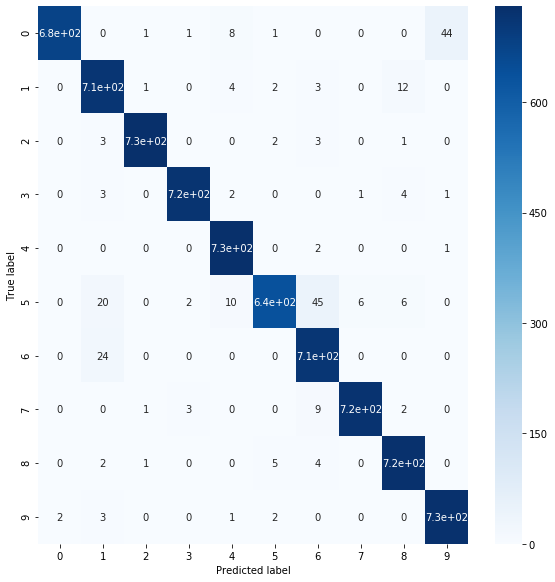

In [17]:
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("10_class_confmat")
plt.show()

